# Scratch workspace

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
from shapely.geometry import Point,Polygon, MultiPolygon, shape
import geopandas as gpd
import descartes
import random

In [4]:
## reading-in relevant files
from pathlib import Path

datapath = Path('../data/')

mich_path = datapath / 'tl_2020_26_cousub_michigan'
oreg_path = datapath / 'tl_2020_41_cousub_oregon'
virg_path = datapath / 'tl_2020_51_cousub_virginia'

mich_df = gpd.read_file(mich_path / 'tl_2020_26_cousub.shp')
oreg_df = gpd.read_file(oreg_path / 'tl_2020_41_cousub.shp')
virg_df = gpd.read_file(virg_path / 'tl_2020_51_cousub.shp')

---

### Data cleaning procedures

After noticing the water in the Michigan map, we decided to clean the data to remove areas where the "land area" variable is 0.

In [18]:
oreg_df = oreg_df[ oreg_df['ALAND']>0 ]
mich_df = mich_df[ mich_df['ALAND']>0 ]
virg_df = virg_df[ virg_df['ALAND']>0 ]

Text(0.5, 114.0, 'Longitude')

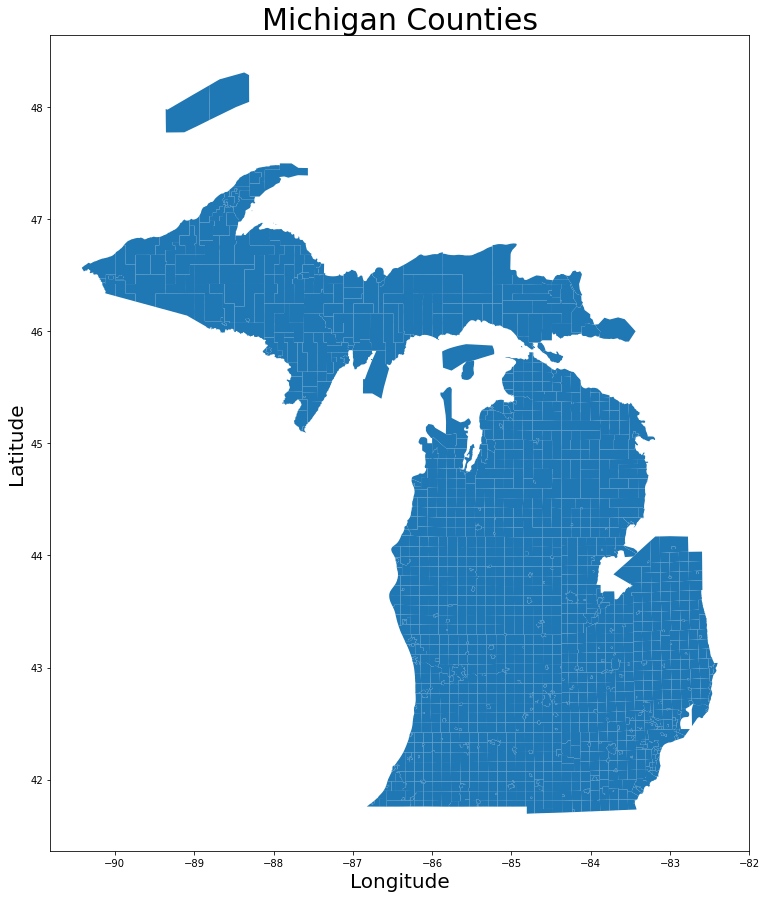

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
mich_df.plot(ax=ax)
ax.set_title('Michigan Counties',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Text(0.5, 216.8652675181311, 'Longitude')

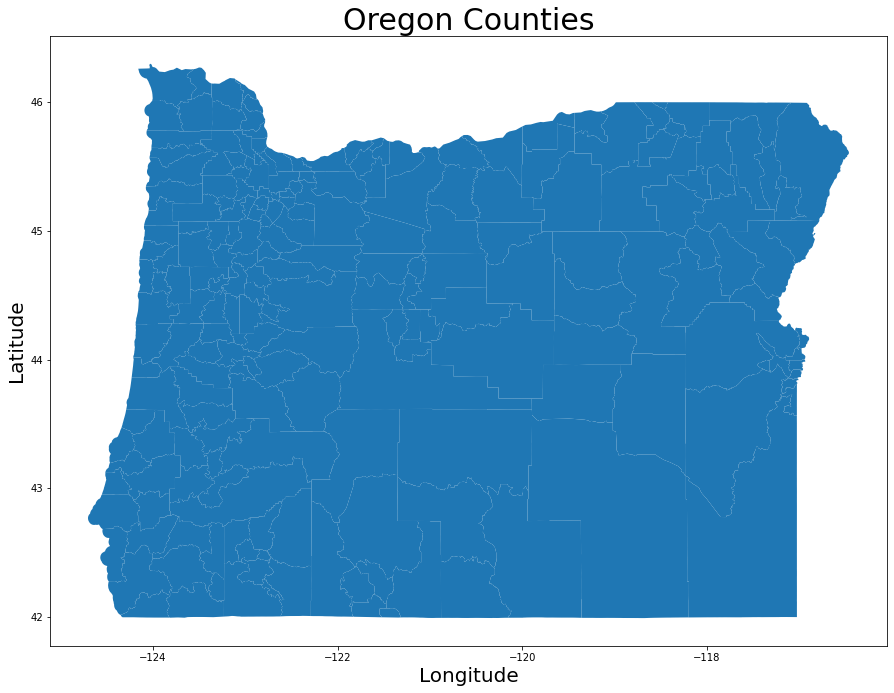

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
oreg_df.plot(ax=ax)
ax.set_title('Oregon Counties',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Text(0.5, 339.1184927857104, 'Longitude')

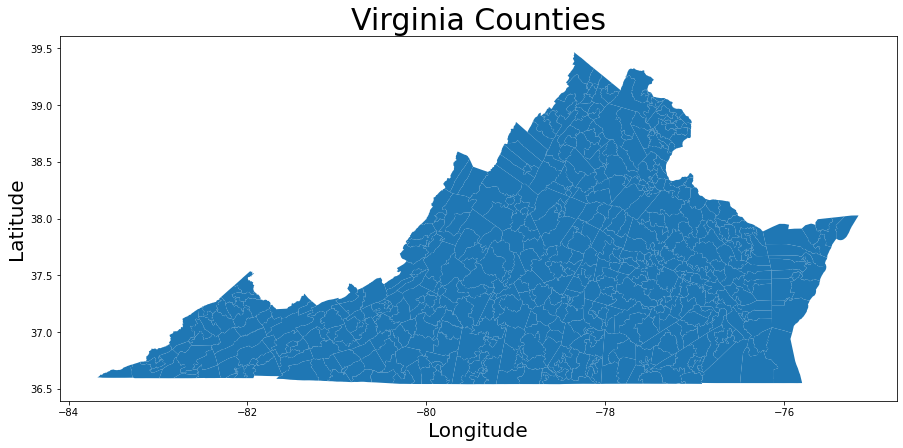

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
virg_df.plot(ax=ax)
ax.set_title('Virginia Counties',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

---

### Merge-in ACS data

In [4]:
import pandas as pd

acs_fname = '../data/ACSDP1Y2019.DP05_2021-07-13T165147/ACSDP1Y2019.DP05_data_with_overlays_2021-06-10T094455.csv'

acs_df = pd.read_csv(acs_fname)

In [6]:
acs_df.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P..."
1,0500000US01003,"Baldwin County, Alabama",223234,*****,223234,(X),109192,1466,48.9,0.7,...,171344,(X),80874,1076,47.2,0.6,90470,1507,52.8,0.6
2,0500000US01015,"Calhoun County, Alabama",113605,*****,113605,(X),54285,701,47.8,0.6,...,87872,(X),41162,477,46.8,0.4,46710,739,53.2,0.4
3,0500000US01043,"Cullman County, Alabama",83768,*****,83768,(X),40579,905,48.4,1.1,...,63818,(X),30623,245,48.0,0.6,33195,683,52.0,0.6
4,0500000US01049,"DeKalb County, Alabama",71513,*****,71513,(X),35688,884,49.9,1.2,...,49295,(X),24299,850,49.3,1.4,24996,808,50.7,1.4
